# Ajuste de curvas a un sistema de oscilador armónico cuántico

## 1.2 Objetivos.

### 1.1 Objetivo General.
* Encontrar el ajuste de curvas adecuado para los resultados experimentales de la función de probabilidad de un electrón en potencial de oscilador armónico.

### 1.2 Objetivos específicos.
* Utilizar el material visto en clase acerca del ajuste de curvas, específicamente el método de mínimos cuadrados.

* Utilizar la librería SciPy, módulo optimize para obtener el ajuste más aproximado a los datos proporcionados de mediciones experimentales y poder concluir al respecto.



## 1.3 Modelo que representa el problema.
Para la formulación matemática de los problemas en la mecánica cuántica se emplean otros métodos distintos a los de la mecánica clásica donde se puede afirmar que los de esta índole son deterministas mientras que la naturaleza de la mecánica cuántica es estadística. Dado un acercamiento formal a esto, la interpretación estadística de Born afirma que encontrar $|\Psi(x,t)|^2$, es encontrar *la densidad de probabilidad de encontrar una partícula en el punto x en un tiempo t*. De manera precisa será:


$$\int _{ a }^{ b }{|\Psi(x,t)|^2 dx} $$


Esto será la probabilidad de encontrar la partícula dentro de un rango de a-b en un tiempo t. Siendo el área bajo la curva de $|\Psi(x,t)|^2$.
___
En la mecánica cuántica se busca encontrar la **función de onda $\Psi$(x,t)** y esta se obtiene de resolver la ecuación de Schrödinger.

>Ecuación de Schrödinger:
>
$$i\hbar \frac{\partial\mathbf{\Psi}}{\partial t}=-\frac {\hbar^2}{2m}\frac{\partial^2\mathbf{\Psi}}{\partial x^2}+V\Psi $$
>
>Para reducir esta a la conocida como *ecuación de Schrödinger independiente del tiempo* se utiliza el método de separación de variables a la ecuación anterior quedando:
$$\Psi (x,\varphi )=\psi (x)\varphi (t)$$
>
$$i\hbar\psi \frac { d\varphi  }{ dt } = -\frac {\hbar^2}{ 2m } \frac { { d }^{ 2 }\psi  }{ d{ x }^{ 2 } }\varphi+ V\varphi\psi$$
>
>Dividiendo todo entre $\psi\varphi$ quedará:
>
$$i\hbar\frac{1}{\varphi} \frac { d\varphi  }{ dt } = -\frac {\hbar^2}{ 2m } \frac{1}{\psi} \frac { { d }^{ 2 }\psi  }{ d{ x }^{ 2 } }+ V$$
>
> Cara lado queda solo como una función de t y x respectivamente por lo que solucionando para cada lado igualando a la constante de separación *E* por la energía permitida en el sistema, quedando:
>
$$i\hbar\frac{1}{\varphi} \frac { d\varphi  }{ dt } =E  $$
$$-\frac {\hbar^2}{ 2m } \frac { { d }^{ 2 }\psi  }{ d{ x }^{ 2 } } +V\psi =E\psi$$
>
> Resolviendo la ecuación para $\varphi(t) $:
$$\varphi (t)={ e }^{ -\frac { iEt }{ \hbar } }$$
>
> Por lo que se puede escribir de esta manera los conocidos como *estados estacionarios*:
$$\Psi(x,t)=\psi(x){ e }^{ -\frac { iEt }{ \hbar } }$$

> La función de onda ya será una combinación lineal de los estados de energía permitidos por el sistema:
$$\Psi (x,t)=\sum _{ n=1 }^{ \infty  }{ { c }_{ n }{ \psi  }_{ n }{ e }^{ -\frac { { itE }_{ n } }{ \hbar  }  } }$$
>
> Para conocer la densidad de probabilidad de una función de onda se le debe sacar el módulo a la anterior expresión quedará (como se explicó anteriormente):
$$|\Psi(x,t)|^2=\Psi^*\Psi=\psi^*{ e }^{ +\frac { iEt }{ \hbar } }\psi{ e }^{ -\frac { iEt }{ \hbar } }=|\psi(x)|^2$$
> **Ya no dependerá de t.**

Para un *oscilador armónico* se parte de la **Ley de Hooke**, que en el modelo clásica quedará como:

$$F=-kx=m\frac { { d }^{ 2 }x  }{ d{ t }^{ 2 } }$$

En donde al resolver la ecuación quedara:
$$x(t)=Asen(\omega t)+Bcos(\omega t)$$

$$\omega=\sqrt { \frac {k  }{m  }  } $$

La energía potencial del problema está dada por(clásico):

$$V(x)=\frac{1}{2} kx^2$$

>Cuanticamente para resolver el problema de oscilador harmónico, solo es necesario conocer el potencial $V(x)$ e introducirlo a la ecuación de Schrödinger independiente del tiempo. El potencial de un oscilador armónico cuántico será:

$$V(x)=\frac{1}{2} m\omega^2x^2$$


>Introduciendo este potencial a la ecuación se obtendrá el **Modelo de la ecuación de Schrödinger con un potencial de oscilador armónico**:
>
$$-\frac {\hbar^2}{ 2m } \frac { { d }^{ 2 }\psi  }{ d{ x }^{ 2 } } +\frac { 1 }{ 2 } m{ \omega  }^{ 2 }{ x }^{ 2 }\psi =E\psi$$
>

Como una solución a esta, por el método algebraico se establecen operadores (escalera), que son de utilidad para determinar los estados posibles del sistema de oscilador armónico:

$$\hbar\omega(a_\pm a_\mp \pm  \frac{1}{2})\psi=E\psi$$

Dónde los operadores escalera están definidos como:

$$a\pm =\frac{1}{\sqrt{2m\hbar\omega}}(\mp ip+mx\omega)$$

El estado de menor energía posible estará determinado utilizando el operador $a_-$ hasta llegar a lo más bajo:

$$a_-\psi_o=0$$

Los estados estacionarios para el problema están dados por (determinando el valor de $\psi_o$:

$$\psi_o(x)=(\frac{m\omega}{\pi\hbar})^\frac{1}{4}{ e }^{ \frac { -mx^2\omega }{2\hbar  }  }$$


Donde para una sucesión n que serán el número de estados estacionarios y o siendo la de menor energía posible, siendo esta la cota *inferior* al problema. Los operadores de $a_+-$ son los llamados "operadores escalera" que determinan los estados posibles enérgeticos.

$$\psi_n(x)=A_n(a_+)^n\psi_o(x)$$

$$E_n=(n+\frac{1}{2})\hbar\omega$$

>Como nota *adicional* se puede ver que no hay posibiliddad de llegar a $E=0$, como si podría hacerlo un oscilador clásico, que la energía toma valores de un continuo. Así mismo la constante $A_n$ es la constante de normalización del problema, esto es el asegurar que la partícula **sí**está en el sistema, sí tiene probabilidades de estar.
___

Para los expererimentos que fueron realizados de un electrón en el sistema de oscilador armónico previamente establecido se necesitaron de constantes a la ecuación para obtener la densidad de probabilidad que fueron las siguientes:

$$\hbar=\frac{h}{2\pi}$$
$$m=m_e=9.11x10^-31kg $$
$$\omega= 1$$

* Constante de Planck $h=6.626x10^-34 Js$
* $m_e$ la masa del electrón.
* $\omega$ la frecuencia angular con valor de 1 por simpleza.

En especifico los resultados experimentales vienen de obtener la *densidad de probabilidad* sacando el módulo para $\psi_o,\psi_1,\psi_2$ respectivamente, quedando de esta manera para introducir las constantes previas:

$$\psi=(\frac{m\omega}{\pi\hbar})^\frac{1}{4}{ e }^{ \frac { -mx^2\omega }{2\hbar  }  }*[1+x\sqrt{\frac{2m\omega}{\hbar}}+\frac{1}{\sqrt{2\hbar}}(2mx^2\omega-\hbar)]$$

$$|\Psi|^2=|\psi|^2=(\frac{m\omega}{\pi\hbar})^\frac{1}{2}{ e }^{ \frac { -mx^2\omega }{\hbar  }  }*[1+\frac{2mx^2\omega}{\hbar}+\frac{1}{2\hbar^2}*(4m^2x^4\omega^2-4mx^2\hbar\omega+\hbar^2)]$$

* Siendo lo del paréntesis los respectivos estados estacionarios previamente mencionados.

En 1954 experimentos idénticos, se midió la posición de la partícula en un tiempo $t=0$. Utilice un ajuste de curvas para obtener la función de densidad $|\Psi(x,0)|^2$ del electrón. Las posiciones encontradas se encuentran en el archivo de Excel adjunto.


## 1.4 Solución del problema de optimización.

Se realizarán 3 ajustes a la curva. Uno con un polinomio de tercer grado, el segundo con un polinomio de quinto grado y, finalmente, un polinomio de octavo grado.

In [1]:
#Primero se importarán las librerías necesarias para realizar el ajuste
import numpy as np
import pandas as pd #Para importar la tabla de datos en la que se encuentran los puntos a ajustar
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Se importa el archivo .csv
file_name = 'experimentos.csv'
data = pd.read_csv(file_name)
data

,Region,Se extiende desde x(cm)=,Hasta x(cm)=,Region con centro en,Veces que fue encontrado en esta region,Probabilidad de encontrarse en la region
0,1,-2.00,-1.92,-1.96,12,0.006141
1,2,-1.92,-1.84,-1.88,14,0.007165
2,3,-1.84,-1.76,-1.80,16,0.008188
3,4,-1.76,-1.68,-1.72,20,0.010235
4,5,-1.68,-1.60,-1.64,25,0.012794
5,6,-1.60,-1.52,-1.56,27,0.013818
6,7,-1.52,-1.44,-1.48,31,0.015865
7,8,-1.44,-1.36,-1.40,33,0.016888
8,9,-1.36,-1.28,-1.32,39,0.019959
9,10,-1.28,-1.20,-1.24,41,0.020983


In [3]:
#Los valores de x serán los puntos centrales de cada segmento
x = data.iloc[:,3].values
#Los valores de y será la probabilidad normalizada. Esto es, que la suma total sea 1.
y = data.iloc[:,5].values
#Definición de la función objetivo
def obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    e = y-yhat
    return np.sum(e**2)
#Se obtendrán los coeficientes para cada función polinomial de orden distinto
bi3=np.zeros(4)
aj3=opt.minimize(obj,bi3,args=(x,y,3))
bi5=np.zeros(6)
aj5=opt.minimize(obj,bi5,args=(x,y,5))
bi8=np.zeros(9)
aj8=opt.minimize(obj,bi8,args=(x,y,8))

In [4]:
#Se asignan los coeficientes a las funciones
b3=aj3.x
yh3=b3.dot([x**i for i in range(4)])
b5=aj5.x
yh5=b5.dot([x**i for i in range(6)])
b8=aj8.x
yh8=b8.dot([x**i for i in range(9)])

## 1.5 Visualización de la solución del problema.

A continuación se pueden ver gráficamente los ajustes de distinto orden junto con los puntos reales.

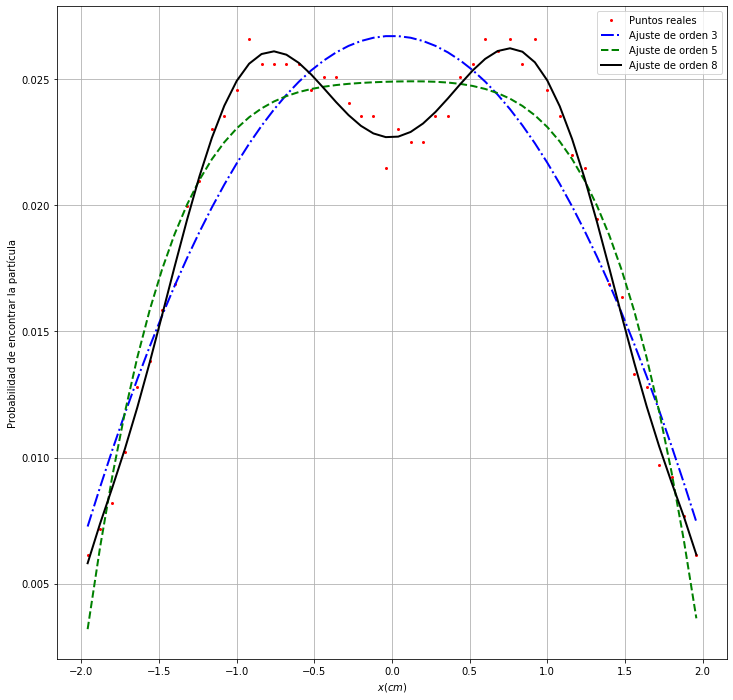

In [5]:
plt.figure(figsize=(12,12))
plt.plot(x,y,'or',ms=2,label='Puntos reales')
plt.plot(x,yh3,'-.b',linewidth=2,label='Ajuste de orden 3')
plt.plot(x,yh5,'--g',linewidth=2,label='Ajuste de orden 5')
plt.plot(x,yh8,'k',linewidth=2,label='Ajuste de orden 8')
plt.grid()
plt.xlabel('$x(cm)$')
plt.ylabel('Probabilidad de encontrar la partícula')
plt.legend(loc='best')
plt.show()

>Se comparará el error de cada una de las funciones polinomiales con los puntos reales.

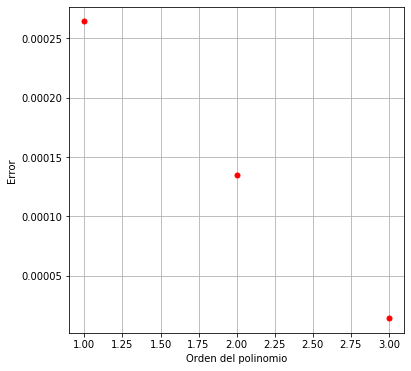

In [6]:
er=[aj3.fun,aj5.fun,aj8.fun]
plt.figure(figsize=(6,6))
plt.plot(range(1,4),er,'ro',ms=5)
plt.grid()
plt.xlabel('Orden del polinomio')
plt.ylabel('Error')
plt.show()

Finalmente, se mostrará a continuación el polinomio (de menor error) con el cual un individuo puede conocer la probabilidad de encontrar la partícula en un segmento de línea de $0.08cm$ de largo.

In [7]:
#Para esto necesitaremos mostrar el polinomio analíticamente
import sympy as sym
sym.var('x')
psi2=b8.dot([x**i for i in range(9)])
psi2

-0.000396911125734211*x**8 - 1.74612307525347e-5*x**7 + 0.00416918856296388*x**6 + 0.00015381239432902*x**5 - 0.0147285536539897*x**4 - 0.000375498358613202*x**3 + 0.0132053285944169*x**2 + 0.000248522447224508*x + 0.0226926427945471

>El usuario puede escribir **dentro de la llave** del siguiente cuadro de código el punto central del segmento en el cuál desee conocer la probabilidad de encontrar la partícula.

In [8]:
psi2.subs({x:0})

0.0226926427945471

## 1.6 Conclusiones.

Se logró un ajuste de curvas bastante aproximado a los datos propuestos experimentalmente con un polinomio de rango 8, utilizando los métodos vistos en clase de ajuste de curvas por medio de mínimos cuadrados.

Mediante el ajuste de curva se encontró la función de densidad $|\Psi(x,0)|^2$ con la cual, en un futuro, podrá estimarse la probabilidad de encontrar a la partícula en un rango determinado con un alto grado de exactitud. De esta manera se ha podido realizar el análisis estadístico de un problema común en la mecánica cuántica.

Adicionalmente, se encontraron limitaciones en la función `minimze` de la librería `scipy.optimize`. Pues al tenerse valores en $x$ menores a 1, ésta es incapaz de proporcionar un ajuste en el error a la curva. Para superar esta limitación fue necesario cambiar las unidades en los rangos de $x$, de metros a centímetros. Además, el ajuste es útil para realizar predicciones dentro del rango ya proporcionado en el archivo en la hoja de datos. Pues, aunque la probabilidad en infinito debería de ser igual a 0, el ajuste indica cantidades que tienden a $-\infty$.


## 1.7 Referencias.
* Griffiths David (2005) "Introduction to quantum mechanics", 2da edición, Pearson Education International, Reed College, Portland, Estados Unidos.